In [1]:
import pandas as pd

In [2]:
from numpy.random import seed
seed(101)
import tensorflow
tensorflow.random.set_seed(101)

In [59]:
import numpy as np
#import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

import keras
from keras.preprocessing import image

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import itertools
import shutil
#import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

In [61]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Recreate the exact same model, including its weights and the optimizer
heridas_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
heridas_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [6]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [55]:
img_path = 'procesar/originales/prueba/1'
new_image = load_image (img_path)

prediccion = heridas_model.predict (new_image)

In [65]:
def clasificacion_heridas (x):
    print ("""Probabilidad que sea LPP, Pie diabetico o Ulcera vascular:""")
    img=mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()
    return prediccion

# Clasificación

In [127]:
img_path = 'procesar/originales/prueba/13'
new_image = load_image (img_path)

prediccion = heridas_model.predict (new_image)

Probabilidad que sea LPP, Pie diabetico o Ulcera vascular:


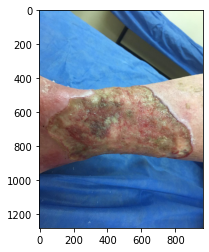

array([[2.4869676e-11, 1.1967749e-07, 9.9999988e-01]], dtype=float32)

In [128]:
clasificacion_heridas (prediccion)

In [90]:
# LPP
# Pie Diabetico
# Ulceras vasculares

ModuleNotFoundError: No module named 'computer'